# Recommendation system model

## Import labrary 

In [1]:
import numpy as np 
import pandas as pd 

## Import Dataset

In [2]:
data= pd.read_csv("Amazon - Movies and TV Ratings.csv")

In [3]:
data_pd = pd.DataFrame(data)

In [4]:
data.head()

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AH3QC2PC1VTGP,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A3LKP6WPMP9UKX,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVIY68KEPQ5ZD,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A1CV1WROP5KTTW,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.shape

(4848, 207)

In [6]:
data.size

1003536

In [7]:
data.describe()

,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,Movie10,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
count,1.0,1.0,1.0,2.0,29.000000,1.0,1.0,1.0,1.0,1.0,...,5.000000,2.0,1.0,8.000000,3.000000,6.000000,1.0,8.000000,35.000000,13.000000
mean,5.0,5.0,2.0,5.0,4.103448,4.0,5.0,5.0,5.0,5.0,...,3.800000,5.0,5.0,4.625000,4.333333,4.333333,3.0,4.375000,4.628571,4.923077
std,NaN,NaN,NaN,0.0,1.496301,NaN,NaN,NaN,NaN,NaN,...,1.643168,0.0,NaN,0.517549,1.154701,1.632993,NaN,1.407886,0.910259,0.277350
min,5.0,5.0,2.0,5.0,1.000000,4.0,5.0,5.0,5.0,5.0,...,1.000000,5.0,5.0,4.000000,3.000000,1.000000,3.0,1.000000,1.000000,4.000000
25%,5.0,5.0,2.0,5.0,4.000000,4.0,5.0,5.0,5.0,5.0,...,4.000000,5.0,5.0,4.000000,4.000000,5.000000,3.0,4.750000,5.000000,5.000000
50%,5.0,5.0,2.0,5.0,5.000000,4.0,5.0,5.0,5.0,5.0,...,4.000000,5.0,5.0,5.000000,5.000000,5.000000,3.0,5.000000,5.000000,5.000000
75%,5.0,5.0,2.0,5.0,5.000000,4.0,5.0,5.0,5.0,5.0,...,5.000000,5.0,5.0,5.000000,5.000000,5.000000,3.0,5.000000,5.000000,5.000000
max,5.0,5.0,2.0,5.0,5.000000,4.0,5.0,5.0,5.0,5.0,...,5.000000,5.0,5.0,5.000000,5.000000,5.000000,3.0,5.000000,5.000000,5.000000


In [8]:
data.columns

Index(['user_id', 'Movie1', 'Movie2', 'Movie3', 'Movie4', 'Movie5', 'Movie6',
       'Movie7', 'Movie8', 'Movie9',
       ...
       'Movie197', 'Movie198', 'Movie199', 'Movie200', 'Movie201', 'Movie202',
       'Movie203', 'Movie204', 'Movie205', 'Movie206'],
      dtype='object', length=207)

In [9]:
# Filter the NA value replace by 0
data_filtered = data.fillna(value=0)
data_filtered.head()

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AH3QC2PC1VTGP,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A3LKP6WPMP9UKX,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AVIY68KEPQ5ZD,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A1CV1WROP5KTTW,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
data_filtered.shape

(4848, 207)

In [11]:

data_filtered1 = data_filtered.drop(columns='user_id')
data_filtered1.head()

,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,Movie10,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
data_filtered1.shape

(4848, 206)

In [13]:
data_filtered1.describe()

,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,Movie10,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
count,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,...,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000
mean,0.001031,0.001031,0.000413,0.002063,0.024546,0.000825,0.001031,0.001031,0.001031,0.001031,...,0.003919,0.002063,0.001031,0.007632,0.002682,0.005363,0.000619,0.007219,0.033416,0.013201
std,0.071811,0.071811,0.028724,0.101545,0.336268,0.057448,0.071811,0.071811,0.071811,0.071811,...,0.130800,0.101545,0.071811,0.188769,0.110296,0.161142,0.043086,0.185478,0.399243,0.254991
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,5.000000,2.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000


## Data Preprocesing

In [14]:
new_df=data_pd.melt(id_vars= data.columns[0],value_vars=data.columns[1:],
                    var_name='Movie',value_name='rating')
new_df.head()

,user_id,Movie,rating
0,A3R5OBKS7OM2IR,Movie1,5.0
1,AH3QC2PC1VTGP,Movie1,NaN
2,A3LKP6WPMP9UKX,Movie1,NaN
3,AVIY68KEPQ5ZD,Movie1,NaN
4,A1CV1WROP5KTTW,Movie1,NaN


In [15]:
new_df.shape

(998688, 3)

Remove the NaN value and store the new_df into df

In [16]:
df=new_df
df.dropna(inplace=True)
df.head()

,user_id,Movie,rating
0,A3R5OBKS7OM2IR,Movie1,5.0
4848,A3R5OBKS7OM2IR,Movie2,5.0
9697,AH3QC2PC1VTGP,Movie3,2.0
14546,A3LKP6WPMP9UKX,Movie4,5.0
14547,AVIY68KEPQ5ZD,Movie4,5.0


In [17]:
# Which movies have maximum views/ratings?
df.groupby('Movie')['rating'].count().sort_values(ascending=False).head(1)

Movie
Movie127    2313
Name: rating, dtype: int64

In [18]:
#What is the average rating for each movie?
ratings=pd.DataFrame(df.groupby('Movie')['rating'].mean())
ratings.head()

,rating
Movie,
Movie1,5.0
Movie10,5.0
Movie100,4.0
Movie101,5.0
Movie102,4.0


In [19]:
#top 5 movies having maximum rating
df.groupby('Movie')['rating'].count().sort_values(ascending=False).head(5)

Movie
Movie127    2313
Movie140     578
Movie16      320
Movie103     272
Movie29      243
Name: rating, dtype: int64

In [20]:
#top 5 movies having least audience 
df.groupby('Movie')['rating'].count().sort_values(ascending=True).head(5)

Movie
Movie1     1
Movie38    1
Movie41    1
Movie42    1
Movie45    1
Name: rating, dtype: int64

In [21]:
ratings['Number of ratings']=pd.DataFrame(df.groupby('Movie')['rating'].count())
ratings.head()

,rating,Number of ratings
Movie,,
Movie1,5.0,1
Movie10,5.0,1
Movie100,4.0,1
Movie101,5.0,5
Movie102,4.0,2


## Visualization Imports

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline 

Now a few Histograms

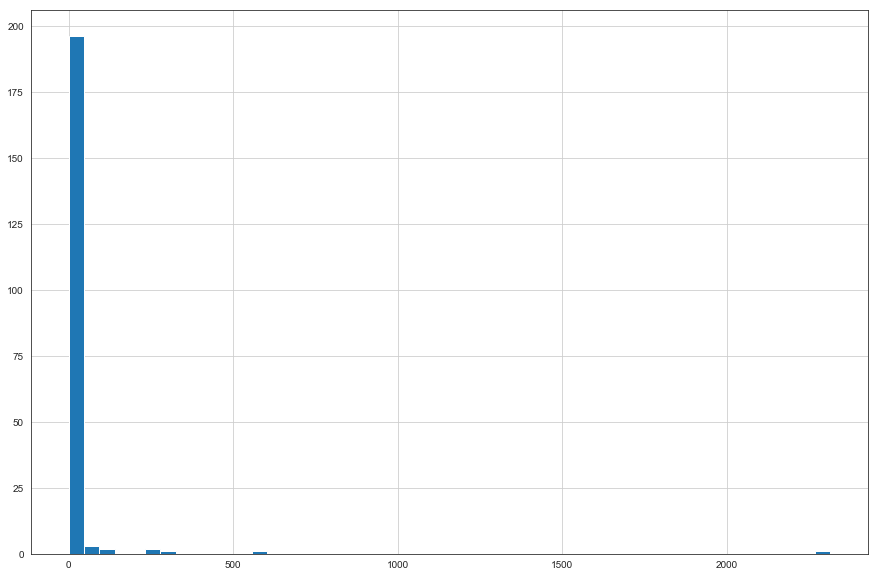

In [23]:
plt.figure(figsize=(15,10))
ratings['Number of ratings'].hist(bins=50)

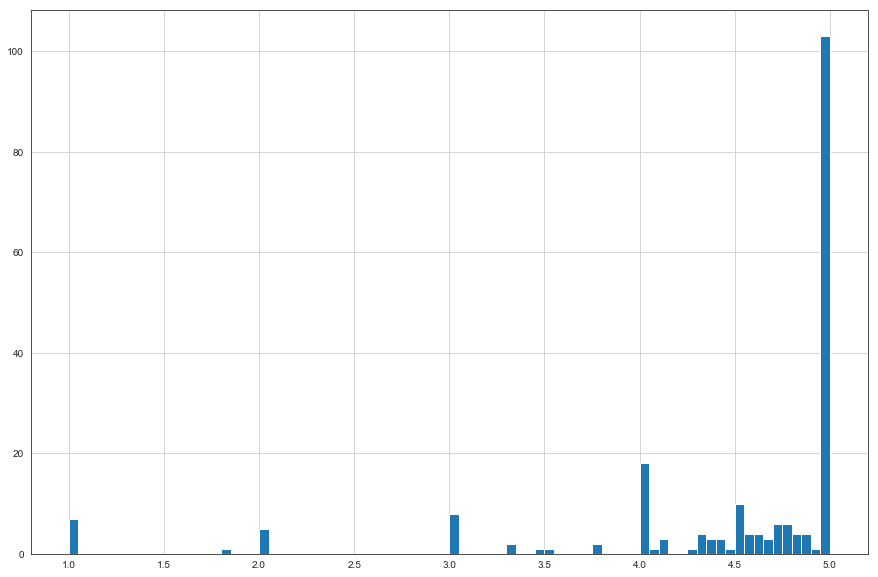

In [24]:
plt.figure(figsize=(15,10))
ratings['rating'].hist(bins=80)

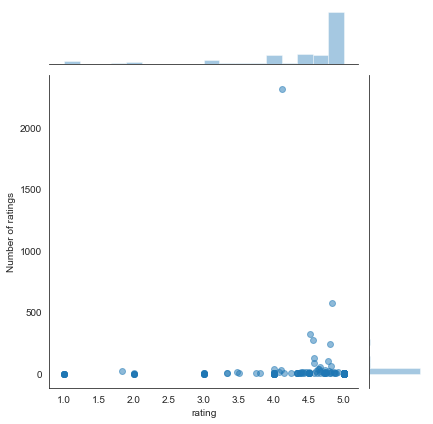

In [25]:
sns.jointplot(x='rating',y='Number of ratings',data=ratings,alpha=0.5)

In [26]:
# to calculate how many movies we are having in the dataset
movie_count=new_df['Movie'].nunique()
movie_count

206

In [27]:
# get the user count without NaN values
user_count=new_df['user_id'].nunique()
user_count

4848

In [28]:
# get the total number of rating given by the custerns
rating_count=new_df['user_id'].count()-movie_count
rating_count

4794

In [29]:
#To find the distribution of different ratings in the datset
stars = new_df.groupby('rating')['rating'].agg(['count'])
stars =pd.DataFrame(stars)
stars

,count
rating,
1.0,363
2.0,185
3.0,272
4.0,521
5.0,3659


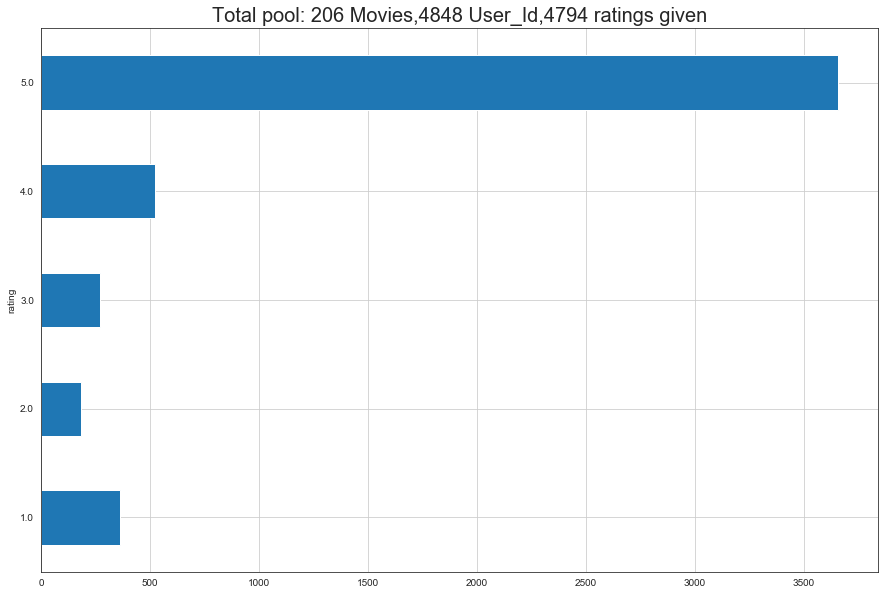

In [30]:
ax=stars.plot(kind='barh',legend=False,figsize=(15,10))
plt.title(f'Total pool: {movie_count} Movies,{user_count} User_Id,{rating_count} ratings given',fontsize=20)
plt.grid(True)

### Recommending Simillar Movies
Now let's create a matrix that has the user ids on one access and the movie title on another axis.Each cell will then consist of the rating the user gave to that movie. Note there will be a lot of NaN values. becouse most people have not seen most of the movies.

In [31]:
data.head()

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AH3QC2PC1VTGP,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A3LKP6WPMP9UKX,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVIY68KEPQ5ZD,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A1CV1WROP5KTTW,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
ratings.sort_values('Number of ratings',ascending=False).head(10)

,rating,Number of ratings
Movie,,
Movie127,4.111976,2313
Movie140,4.833910,578
Movie16,4.518750,320
Movie103,4.562500,272
Movie29,4.806584,243
Movie91,4.578125,128
Movie92,4.772277,101
Movie89,4.578313,83
Movie158,4.818182,66


Now let's grab the user ratings for those two movies.

In [33]:
Movie103_user_ratings=data['Movie103']
Movie91_user_ratings=data['Movie91']
Movie103_user_ratings.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Movie103, dtype: float64

We can then use corrwith() method to get correlation between two pandas series:

In [34]:
similar_to_movie103=data.corrwith(Movie103_user_ratings)
similar_to_movie91=data.corrwith(Movie91_user_ratings)

C:\New folder\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\New folder\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Let's clean this by removing NaN values and using a DataFrame insted of a series:

In [35]:
Corr_Movie103=pd.DataFrame(similar_to_movie103,columns=['Correlation'])
Corr_Movie103.dropna(inplace=True)
Corr_Movie103

,Correlation
Movie89,0.423077
Movie92,0.355643
Movie103,1.000000
Movie127,0.288675


Now if we sort the dataframe by corretion, we should get the most similar movies, however note taht we get some results that don't really make sense. This is because there are a lot of movies only watched once by user who also watched Movie103 (it was the most poputar movie

In [36]:
Corr_Movie103.sort_values('Correlation',ascending=False).head()

,Correlation
Movie103,1.000000
Movie89,0.423077
Movie92,0.355643
Movie127,0.288675


In [37]:
ratings.head()

,rating,Number of ratings
Movie,,
Movie1,5.0,1
Movie10,5.0,1
Movie100,4.0,1
Movie101,5.0,5
Movie102,4.0,2


Let's fix  this by fitering out movies that have less than 50 reviews (this value was chosen based off the histogram from earlier).

In [38]:
Corr_Movie103=Corr_Movie103.join(ratings['Number of ratings'])
Corr_Movie103.head()

,Correlation,Number of ratings
Movie89,0.423077,83
Movie92,0.355643,101
Movie103,1.000000,272
Movie127,0.288675,2313


Now sort the value and notice how the titles make a lot more sense

In [39]:
Corr_Movie103[Corr_Movie103['Number of ratings']>50].sort_values('Correlation',ascending=False).head()

,Correlation,Number of ratings
Movie103,1.000000,272
Movie89,0.423077,83
Movie92,0.355643,101
Movie127,0.288675,2313


The Movie103 user next recommended movies is Movies 89 and next one is Movie 92 and so on.

Now the same for the Movie91

In [40]:
corr_movie91=pd.DataFrame(similar_to_movie91,columns=['Correlation'])
corr_movie91.dropna(inplace=True)
corr_movie91=corr_movie91.join(ratings['Number of ratings'])
corr_movie91[corr_movie91['Number of ratings']>50].sort_values('Correlation',ascending=False).head()

,Correlation,Number of ratings
Movie89,1.000000,83
Movie91,1.000000,128
Movie92,-0.139876,101


The movie91 user next recommanded movie is Movie89

##  Model Recommended stystem for Movie rating

In [41]:
new_df = new_df.fillna(0)
new_df.shape

(5000, 3)

## Buil the Recommendation system model

In [42]:
# library import
import surprise
from surprise import Reader
from surprise import Dataset
from surprise import SVD
from surprise.model_selection import train_test_split

In [43]:
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(new_df.fillna(0), reader=reader)

In [44]:
#Divide the data into training and test data
trainset, testset = train_test_split(data, test_size=0.25)

In [45]:
algo = SVD()

In [46]:
#Building a model
algo.fit(trainset)

In [47]:
#Make predictions on the test data
predict= algo.test(testset)

In [48]:
from surprise.model_selection import cross_validate

In [49]:
cross_validate(algo,data,measures=['RMSE','MAE'],cv=3,verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.1634  1.1305  1.1807  1.1582  0.0208  
MAE (testset)     0.8532  0.8445  0.8671  0.8549  0.0093  
Fit time          0.49    0.50    0.57    0.52    0.04    
Test time         0.02    0.02    0.02    0.02    0.00    


{'test_rmse': array([1.16344083, 1.13051442, 1.18071092]),
 'test_mae': array([0.85319749, 0.84453413, 0.86708098]),
 'fit_time': (0.4898984432220459, 0.49599719047546387, 0.5718433856964111),
 'test_time': (0.023512601852416992,
  0.01562809944152832,
  0.015624284744262695)}

In [50]:
user_id='A1CV1WROP5KTTW'
Movie='Movie6'
rating='5'
algo.predict(user_id,Movie,r_ui=rating)
print(cross_validate(algo,data,measures=['RMSE','MAE'],cv=3,verbose=True))

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.1368  1.2229  1.1130  1.1576  0.0472  
MAE (testset)     0.8302  0.8764  0.8314  0.8460  0.0215  
Fit time          0.39    0.37    0.38    0.38    0.01    
Test time         0.02    0.02    0.02    0.02    0.00    
{'test_rmse': array([1.13678818, 1.22287837, 1.11298604]), 'test_mae': array([0.83022278, 0.87639961, 0.83137087]), 'fit_time': (0.39234352111816406, 0.3749690055847168, 0.3841288089752197), 'test_time': (0.015623092651367188, 0.01562356948852539, 0.01899266242980957)}
